# Unsupervised Learning-Hierachical Clustering

***

# `Customer Spend Data`

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import zscore
import seaborn as sns
# sns.set()

In [2]:
df=pd.read_csv(r'D:\Datasets\19.Cust_Spend_Data.csv')

In [3]:
print('Shape of Dataset: ',df.shape)

Shape of Dataset:  (10, 7)


In [4]:
df.head()

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3


- FnV means Fruits and Vegitable

In [5]:
# names and cutomer ids are not attributes, these are just names which doesnt add value to our model
df_attributes=df.iloc[:,2:]
df_attributes.head()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,10000,2,1,1,0
1,7000,3,0,10,9
2,7000,7,1,3,4
3,6500,5,1,1,4
4,6000,6,0,12,3


In [6]:
# Range of various variables are different so we need to scale them
df_attributes_scaled=df_attributes.apply(zscore)
df_attributes_scaled.head()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1.886498,-1.240347,1.527525,-0.741433,-1.380131
1,0.787567,-0.620174,-0.654654,1.280656,1.725164
2,0.787567,1.860521,1.527525,-0.292080,0.000000
3,0.604412,0.620174,1.527525,-0.741433,0.000000
4,0.421257,1.240347,-0.654654,1.730009,-0.345033


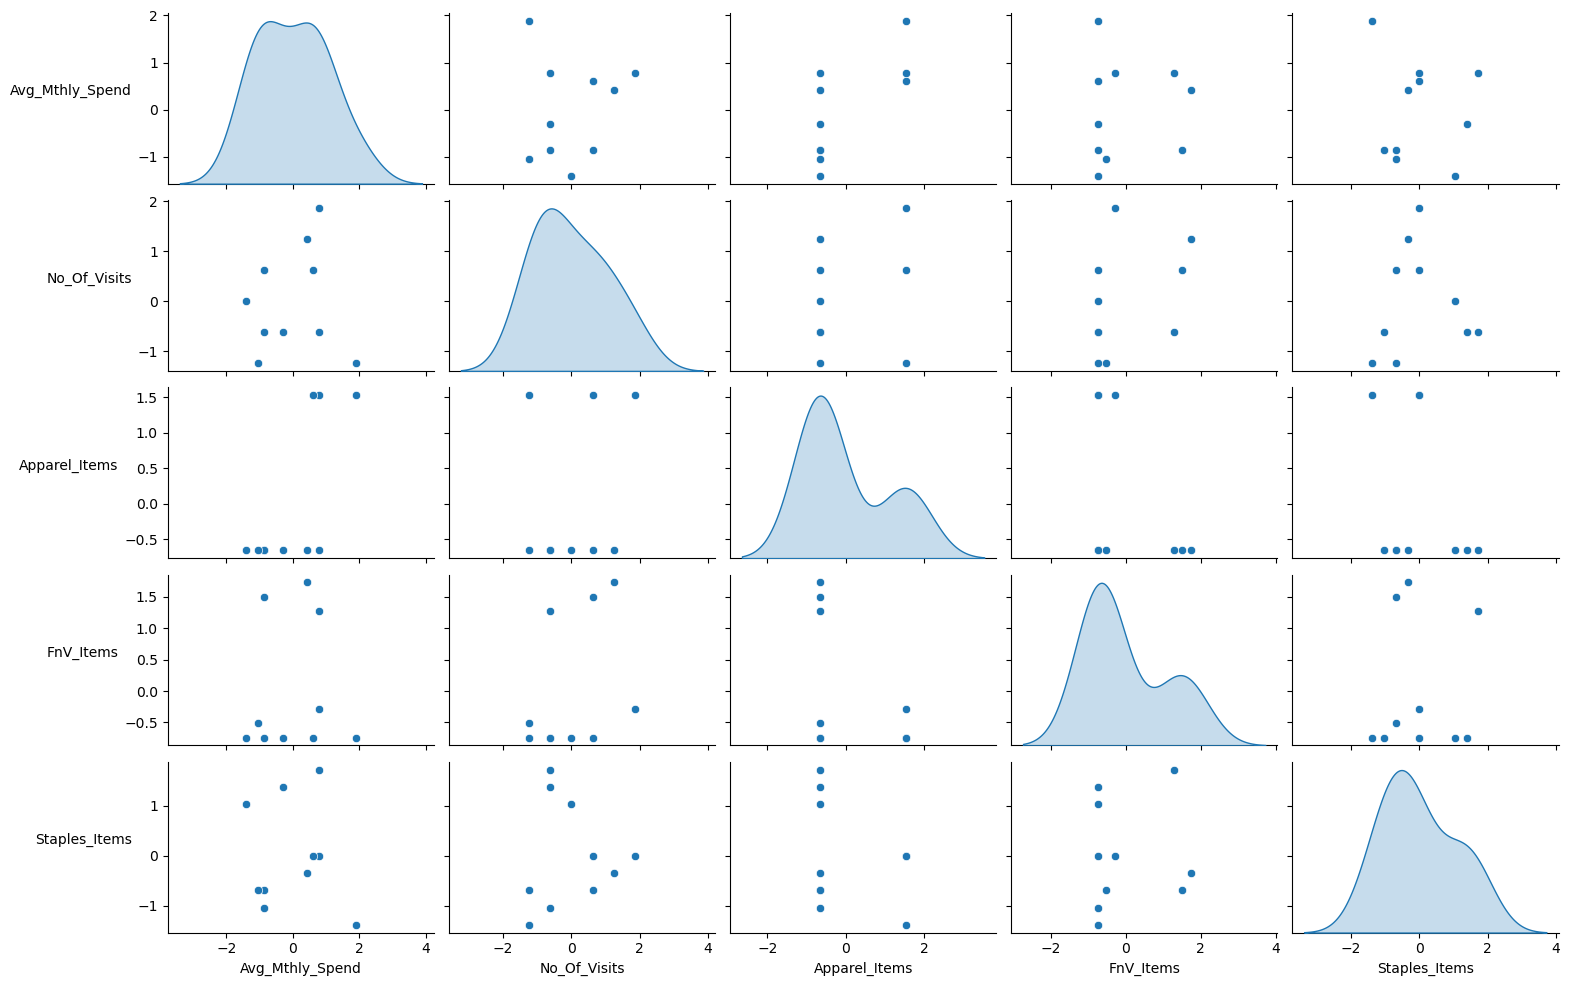

In [7]:

g=sns.pairplot(df_attributes_scaled,height=2,aspect=1.5,diag_kind='kde')

for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 0)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')

### Aggromerative Clustering

In [8]:
from sklearn.cluster import AgglomerativeClustering

In [9]:
model=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='average')

In [10]:
model.fit(df_attributes_scaled)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [11]:
df_attributes['labels']=model.labels_
df_attributes.head(6)

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,labels
0,10000,2,1,1,0,0
1,7000,3,0,10,9,1
2,7000,7,1,3,4,0
3,6500,5,1,1,4,0
4,6000,6,0,12,3,1
5,4000,3,0,1,8,2


In [12]:
df_attributes[df_attributes['labels']==0]

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,labels
0,10000,2,1,1,0,0
2,7000,7,1,3,4,0
3,6500,5,1,1,4,0


**<font color='green'>Cluster 1- All bought Apparel Items.</font>**

In [13]:
df_attributes[df_attributes['labels']==1]

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,labels
1,7000,3,0,10,9,1
4,6000,6,0,12,3,1
6,2500,5,0,11,2,1


**<font color='green'>Cluster 2- All bought FnV Items in large quantity.</font>**

In [14]:
df_attributes[df_attributes['labels']==2]

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,labels
5,4000,3,0,1,8,2
7,2500,3,0,1,1,2
8,2000,2,0,2,2,2
9,1000,4,0,1,7,2


**<font color='green'>Cluster 3- All mostly bought Staple items.</font>**

In [15]:
df_clusters=df_attributes.groupby(['labels'])
df_clusters.mean()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
labels,,,,,
0,7833.333333,4.666667,1.0,1.666667,2.666667
1,5166.666667,4.666667,0.0,11.000000,4.666667
2,2375.000000,3.000000,0.0,1.250000,4.500000


In [16]:
from scipy.cluster.hierarchy import cophenet,dendrogram,linkage

from scipy.spatial.distance import pdist #pairwise distribution between data

In [17]:
Z=linkage(df_attributes_scaled,metric='euclidean',method='average')

In [18]:
c, coph_dists=cophenet(Z,pdist(df_attributes_scaled))

c

0.8681149436293064

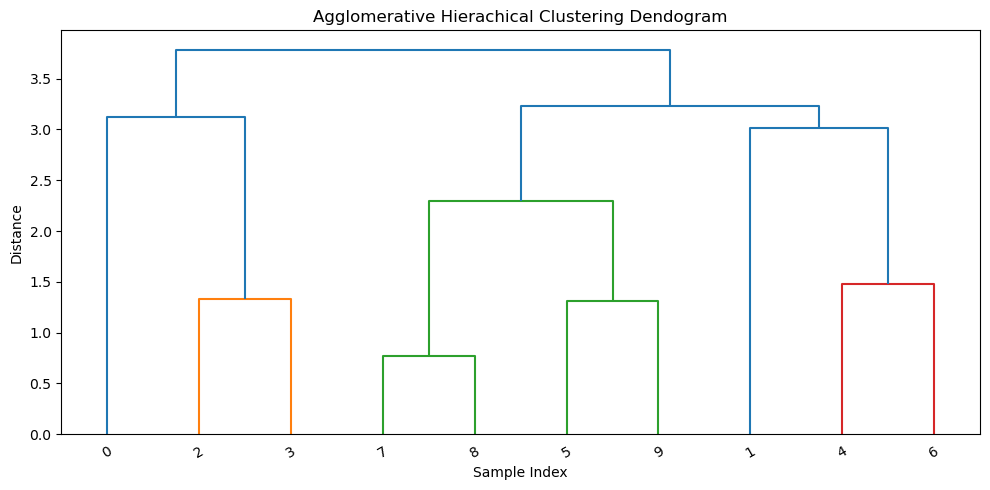

In [19]:
plt.figure(figsize=(10,5))
plt.title('Agglomerative Hierachical Clustering Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z,leaf_rotation=30,leaf_font_size=10)
plt.tight_layout()

In [20]:
Z=linkage(df_attributes_scaled,metric='euclidean',method='complete')

c, coph_dists=cophenet(Z,pdist(df_attributes_scaled))

c

0.8606955190809153

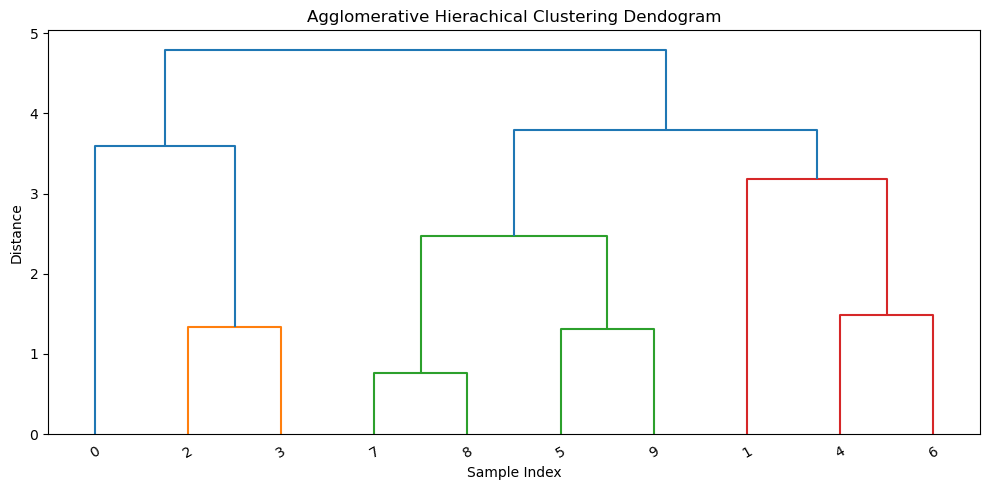

In [21]:
plt.figure(figsize=(10,5))
plt.title('Agglomerative Hierachical Clustering Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z,leaf_rotation=30,leaf_font_size=10)
plt.tight_layout()

In [22]:
Z=linkage(df_attributes_scaled,metric='euclidean',method='ward')

c, coph_dists=cophenet(Z,pdist(df_attributes_scaled))

c

0.8453818941339526

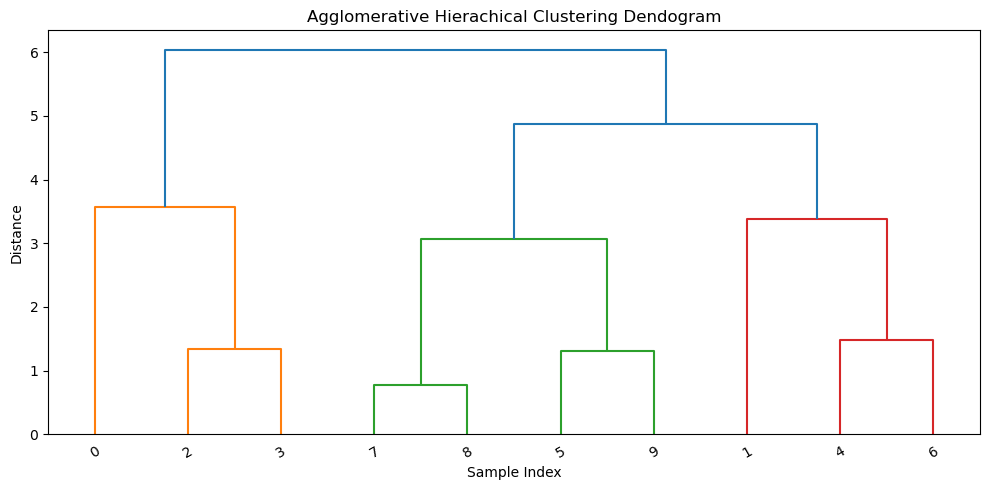

In [23]:
plt.figure(figsize=(10,5))
plt.title('Agglomerative Hierachical Clustering Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z,leaf_rotation=30,leaf_font_size=10)
plt.tight_layout()